**First, let's open the dataset and examime the general information**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [5]:
# Now we will lowercase the names of the fields.
data.columns = data.columns.str.lower()

data    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Now let's correct the data types and process missing values

In [219]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')


In [220]:
try:
    data['user_score'] = data['user_score'].astype('float')
except:
    pass

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [221]:
data_slice = data.loc[data['user_score'] != 'tbd']
data_slice.loc[:, 'user_score'] = data_slice.loc[:, 'user_score'].astype('float')
#data_slice.info()
median_score = data_slice.groupby('genre')['user_score'].median()
#median_score['genre'] = median_score.index
median_score.reset_index()

,genre,user_score
0,Action,7.4
1,Adventure,7.6
2,Fighting,7.6
3,Misc,7.1
4,Platform,7.7
5,Puzzle,7.5
6,Racing,7.4
7,Role-Playing,7.8
8,Shooter,7.4
9,Simulation,7.5


In [222]:
data = data.merge(median_score, left_on='genre', right_index=True, how='left')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score_x,rating,user_score_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,7.4
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,7.7
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,7.4
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,7.4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,7.4
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,7.4
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,7.6
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,7.7


In [223]:
for genre in data['genre'].unique():
    data.loc[(data['genre'] == genre) & (data['user_score_x'] == 'tbd'), 'user_score_x'] = data.loc[(data['genre'] == genre), 'user_score_y']

In [224]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score_x,rating,user_score_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,7.4
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,7.7
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,7.4
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,7.4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,7.4
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,7.4
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,7.6
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,7.7


Let's calculate the total sales in all regions and record them in a separate column.

In [225]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score_x,rating,user_score_y,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,7.4,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,7.7,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,7.4,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,7.4,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,7.8,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,7.4,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,7.4,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,7.6,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,7.7,0.01


Let's check how many games were released each year.

In [226]:
data.groupby('year_of_release')['name'].count().sort_values()


year_of_release
1980       9
1984      14
1985      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: name, dtype: int64

In [227]:
print(data.groupby('year_of_release')['name'].count().sort_values().mean(), data.groupby('year_of_release')['name'].count().median())

444.43243243243245 338.0


It makes sense to use data for the years in which at least 338 games were released (median value).

Let's see how sales by platform have changed.

In [228]:
pd.set_option('display.max_columns', None)
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's take the TOP 5 platforms by total sales.

In [229]:
top_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head()
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Distribution of total sales of the TOP 5 platforms by year.

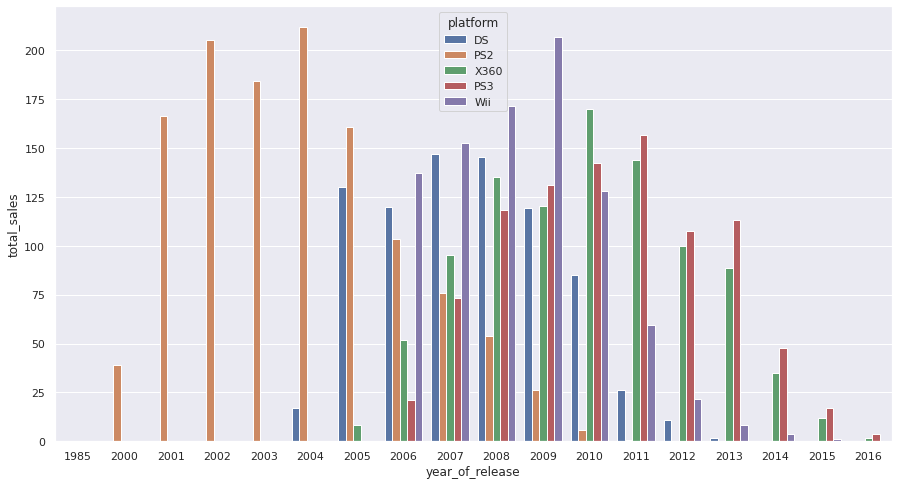

In [230]:
top_platforms_names = top_platforms.index
data_slice_1 = data.query('platform in @top_platforms_names').pivot_table(
    index=['year_of_release', 'platform'],
    values='total_sales',
    aggfunc='sum'
).reset_index()
data_slice_1

plt.figure(figsize=(15,8))
ax = sns.barplot(
    x='year_of_release',
    y='total_sales',
    hue='platform',
    data=data_slice_1    
)

As can be seen from the graph, the lifetime of each platform is +/- 10 years. At the same time, each new platform appears in the 2nd year of the old one's life, with the exception of the PS2, which for 4 years was the only platform within this data slice.

For the forecast of 2017, let's take the data for 2015 as a basis - firstly, they are the most recent and complete (2016 is not complete) of those available, secondly, they are relatively close to the median and average total sales of all platforms by year for the entire period.

In [231]:
data_slice_2 = data.query('year_of_release == 2015').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
data_slice_2

,total_sales
platform,
PS4,118.90
XOne,60.14
3DS,27.78
PS3,16.82
WiiU,16.35
X360,11.96
PC,8.52
PSV,6.25
Wii,1.14


In [232]:
data_slice_2.reset_index().loc[:4]['total_sales'].sum() / data_slice_2.reset_index()['total_sales'].sum() * 100.0

89.5551906858721

As can be seen from the table above, the most successful platforms are: PS4, XOne, 3DS, PS3 and WiiU - together they account for 90% of all sales in 2015.

Let's draw a box-and-whiskers diagram for global game sales by platform (TOP 5 platforms in 2015 by total sales).

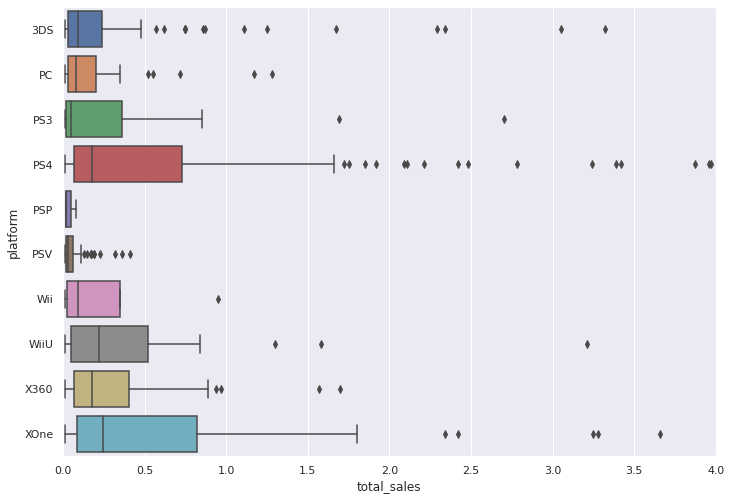

In [233]:
data_slice_3 = data.query('year_of_release == 2015').pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum').reset_index()
sns.boxplot(data=data_slice_3['platform'], x=data_slice_3['total_sales'], y=data_slice_3['platform']).set_xlim(0, 4)
sns.set(rc={'figure.figsize': (11.7, 8.27)})


Apparently, the distribution of total global sales by games within each platform in 2015 is skewed to the left, because the distance from Q1 to Q2 (the median value) is much less than the distance from Q2 to Q3. Moreover, the first three graphs also indicate a significant number of abnormal values (emissions) located above the "right whisker span".

Let's build a scatter plot and calculate the correlation between reviews and sales within the most popular platform in 2015.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


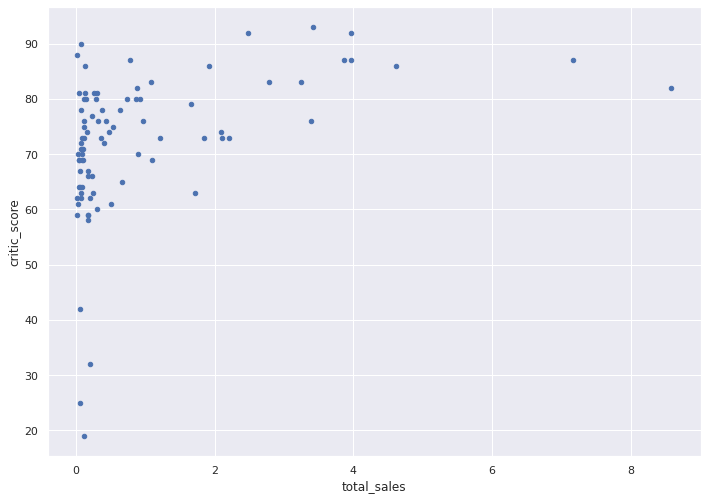

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Корреляция между продажами внутри PS4 и оценкой критиков: 0.4123418699511164


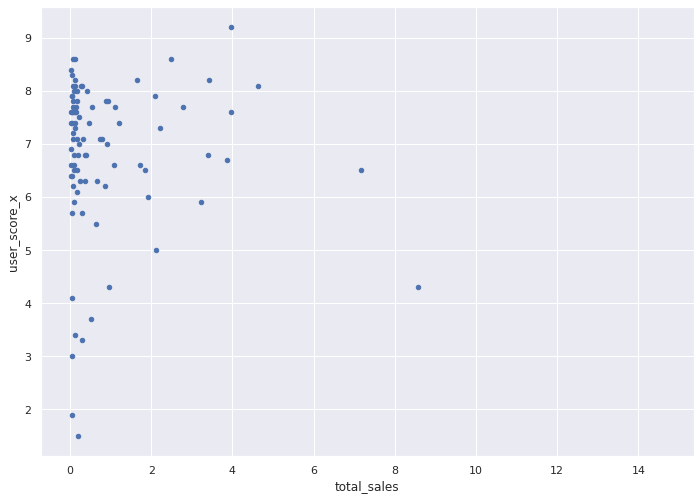

Корреляция между продажами внутри PS4 и оценкой пользователей: -0.00479908107865172


In [239]:
data_slice_4 = data.query('year_of_release == 2015');
data_slice_4.loc[data_slice_4['platform'] == 'PS4'].plot(x='total_sales', y='critic_score', kind='scatter');
plt.show();
corr_critic_score = data_slice_4.loc[data_slice_4['platform'] == 'PS4']['total_sales'].corr(data_slice_4.loc[data_slice_4['platform'] == 'PS4']['critic_score'].astype('float'));
print('Корреляция между продажами внутри PS4 и оценкой критиков:', corr_critic_score);
data_slice_4.loc[data_slice_4['platform'] == 'PS4'].plot(x='total_sales', y='user_score_x', kind='scatter');
plt.show();
corr_user_score = data_slice_4.loc[data_slice_4['platform'] == 'PS4']['total_sales'].corr(data_slice_4.loc[data_slice_4['platform'] == 'PS4']['user_score_x'].astype('float'));
print('Корреляция между продажами внутри PS4 и оценкой пользователей:', corr_user_score);
#sns.set(rc={'figure.figsize': (10, 10)})


There is a weak positive linear relationship between the critics' assessment and sales volume (coefficient of correlation = 0.4), while user evaluation does not affect sales growth in any way.

Let's try to correlate the conclusions on the PS4 platform with the nature of the relationship between the ratings of critics and users and sales on other platforms.

In [240]:
data_slice_new['platform'].unique()

array(['PS4', 'XOne', 'WiiU', '3DS', 'PC', 'PSV', 'PS3'], dtype=object)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


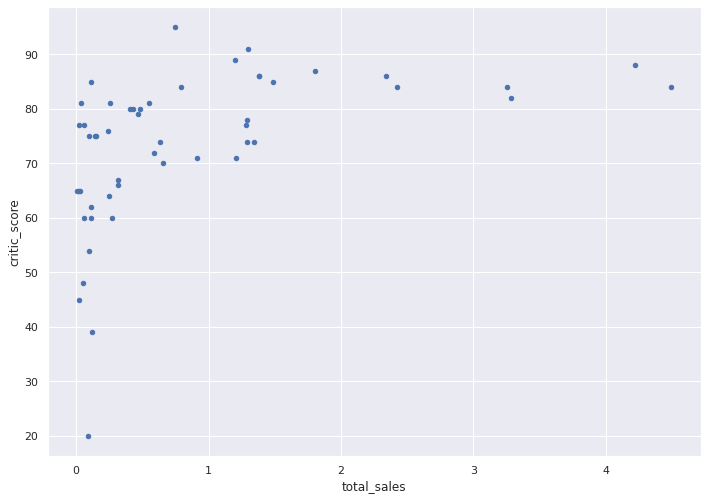

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Корреляция между продажами внутри XOne и оценкой критиков: 0.48520543032907365


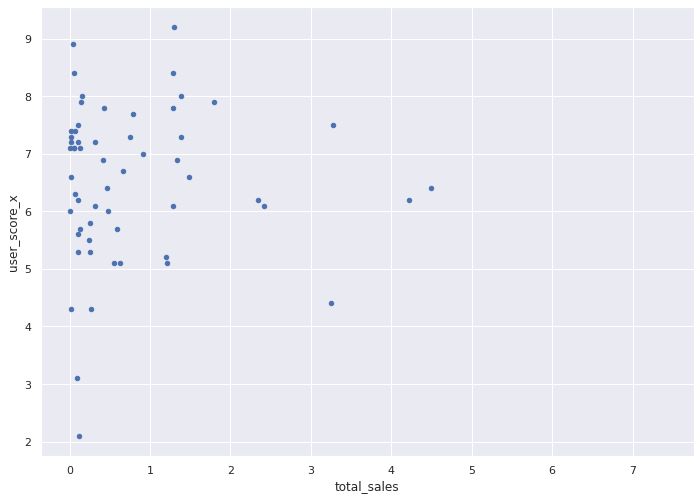

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Корреляция между продажами внутри XOne и оценкой  пользователей: 0.019734877311672637


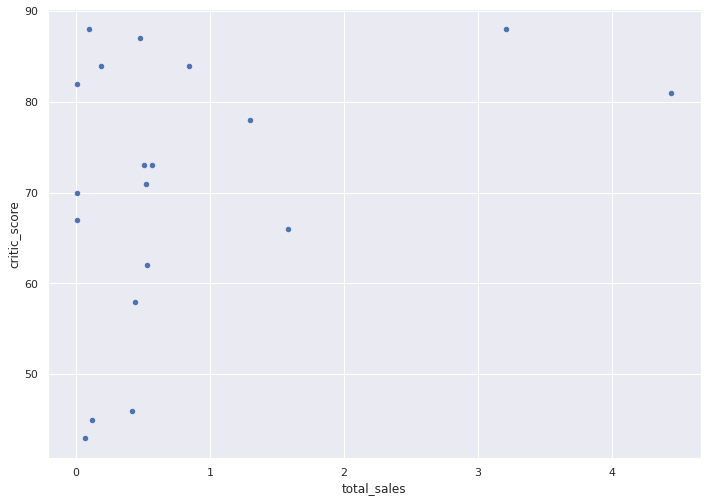

Корреляция между продажами внутри WiiU и оценкой критиков: 0.33282932031848395


TypeError: 'value' must be an instance of str or bytes, not a float

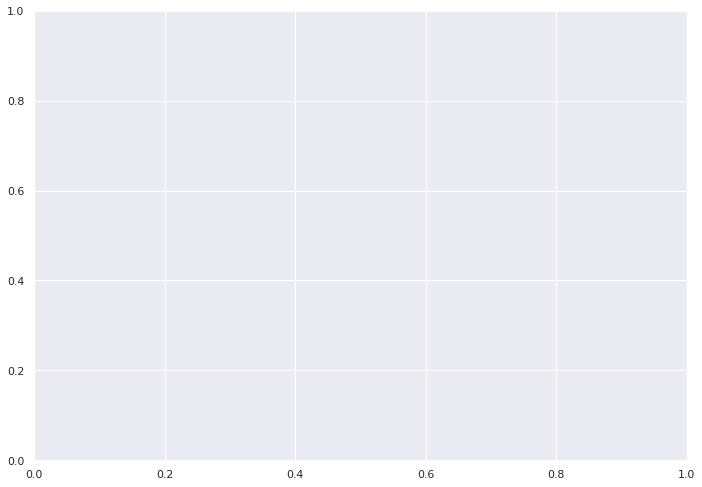

In [241]:
for platform in data_slice_4.loc[data_slice_4['platform'] != 'PS4']['platform'].unique():
    data_slice_4.loc[data_slice_4['platform'] == platform].plot(x='total_sales', y='critic_score', kind='scatter');
    plt.show();
    print(f'Корреляция между продажами внутри {platform} и оценкой критиков:', data_slice_4.loc[data_slice_4['platform'] == platform]['total_sales'].corr(data_slice_4.loc[data_slice_4['platform'] == platform]['critic_score'].astype('float')));
    data_slice_4.loc[data_slice_4['platform'] == platform].plot(x='total_sales', y='user_score_x', kind='scatter');
    plt.show();
    print(f'Корреляция между продажами внутри {platform} и оценкой  пользователей:', data_slice_4.loc[data_slice_4['platform'] == platform]['total_sales'].corr(data_slice_4.loc[data_slice_4['platform'] == platform]['user_score_x'].astype('float')));

Detected:

Between sales and critical acclaim:
- Positive linear connection inside the PC platform (0.6)
- Positive linear connection inside the XOne platform (0.5)

Between sales and user evaluation:
- Weak negative linear coupling within the PS3 platform (-0.4)

Let's look at the overall distribution of all games by genre in 2015.

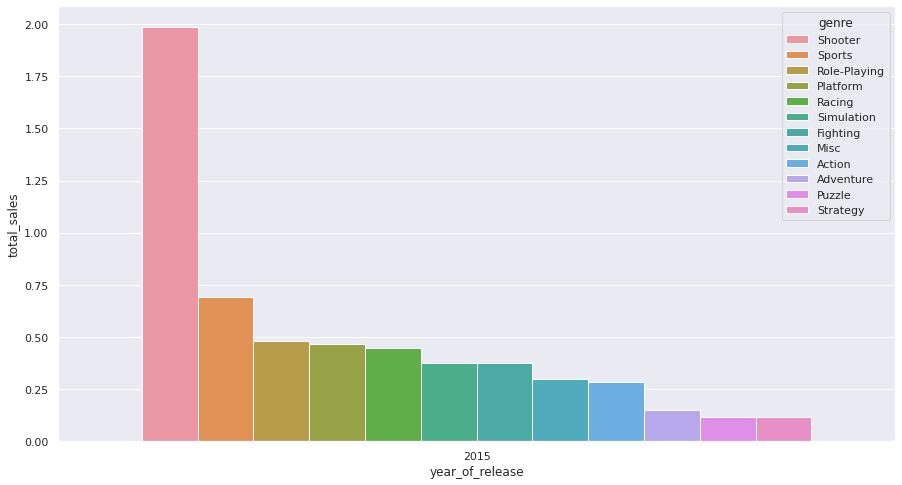

In [242]:
data_slice_6 = data_slice_4.pivot_table(
    index=['year_of_release', 'genre'],
    values='total_sales',
    aggfunc='mean'
).reset_index().sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15,8))
ax_1 = sns.barplot(
    x='year_of_release',
    y='total_sales',
    hue='genre',
    data=data_slice_6   
)


The most profitable genres are: Shooter, Sports, Role-Playing, Platform, Racing. The least profitable ones are Strategy, Puzzle, Adventure, Action and Misc.

Let's identify the most popular (TOP 5) platforms within each region.

In [243]:
data_slice_na = data_slice_4.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head(5)
data_slice_na['share'] = (data_slice_na['na_sales'] / data_slice_4['na_sales'].sum() * 100.0).round(1)
data_slice_na

,platform,na_sales,share
3,PS4,42.37,39.7
9,XOne,36.03,33.7
8,X360,7.36,6.9
7,WiiU,6.76,6.3
0,3DS,6.17,5.8


In [244]:
data_slice_eu = data_slice_4.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head(5)
data_slice_eu['share'] = (data_slice_eu['eu_sales'] / data_slice_4['eu_sales'].sum() * 100.0).round(1)
data_slice_eu

,platform,eu_sales,share
3,PS4,51.76,53.5
9,XOne,18.47,19.1
2,PS3,6.04,6.2
1,PC,5.57,5.8
0,3DS,5.06,5.2


In [245]:
data_slice_jp = data_slice_4.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head(5)
data_slice_jp['share'] = (data_slice_jp['jp_sales'] / data_slice_4['jp_sales'].sum() * 100.0).round(1)
data_slice_jp

,platform,jp_sales,share
0,3DS,15.52,45.5
3,PS4,6.31,18.5
5,PSV,4.85,14.2
2,PS3,3.67,10.8
7,WiiU,3.45,10.1


In North America, about 75% of all sales are distributed between PS4 and XOne. In Europe, more than half is accounted for by PS4, 19% by XOne, in Japan the most popular platform is 3DS (46%), followed by PS4, PSV, PS3 and WiiU - 19%, 14%, 11 and 10% respectively.

Let's identify the most popular (TOP 5) genres within each region.

In [246]:
data_slice_na_genre = data_slice_4.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head(5)
data_slice_na_genre['share'] = (data_slice_na_genre['na_sales'] / data_slice_4['na_sales'].sum() * 100.0).round(1)
data_slice_na_genre

,genre,na_sales,share
8,Shooter,31.94,29.9
0,Action,24.39,22.8
10,Sports,18.77,17.6
7,Role-Playing,13.93,13.0
3,Misc,4.82,4.5


In [247]:
data_slice_eu_genre = data_slice_4.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head(5)
data_slice_eu_genre['share'] = (data_slice_eu_genre['eu_sales'] / data_slice_4['eu_sales'].sum() * 100.0).round(1)
data_slice_eu_genre

,genre,eu_sales,share
8,Shooter,24.38,25.2
0,Action,24.14,25.0
10,Sports,15.81,16.3
7,Role-Playing,12.93,13.4
6,Racing,4.75,4.9


In [248]:
data_slice_jp_genre = data_slice_4.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head(5)
data_slice_jp_genre['share'] = (data_slice_jp_genre['jp_sales'] / data_slice_4['jp_sales'].sum() * 100.0).round(1)
data_slice_jp_genre

,genre,jp_sales,share
0,Action,15.98,46.9
7,Role-Playing,6.80,19.9
8,Shooter,2.73,8.0
3,Misc,2.15,6.3
9,Simulation,1.60,4.7


In North America, about 50% of all sales are distributed between Shooter and Action. In Europe, similarly, in Japan, the most popular genre is Action (47%), in second place is Role_Playing (20%).

Let's check whether the ESRB rating affects sales in a particular region.

In [251]:
data_slice_4['rating'] = data_slice_4['rating'].fillna('no_rating')
data_slice_4['rating'].unique()

array(['no_rating', 'E', 'M', 'T', 'E10+'], dtype=object)

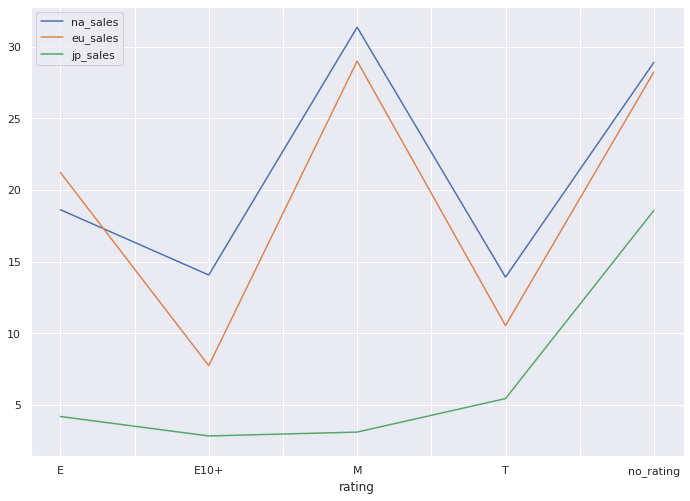

<Figure size 1080x576 with 0 Axes>

In [252]:
ax_na = data_slice_4.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index().plot(x='rating', y='na_sales')

plt.figure(figsize=(15,8))
ax_eu = data_slice_4.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index().plot(x='rating', y='eu_sales', ax=ax_na)
ax_jp = data_slice_4.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index().plot(x='rating', y='jp_sales', ax=ax_na)

Apparently, in the regions of North America and Europe, the peak of sales falls on the M rating, and the decline is on the E10+. The same trend can be seen in Japan, but with less significant variations. However, in Japan, unrated games account for the most sales.

Let's check the H0 hypothesis: The average user ratings of the XBox and PC platforms are the same.
Hypothesis H1: The average user ratings of the XBox and PC platforms are not the same.
I chose a st.ttest_ind method to estimate the average of two general populations from the samples taken from them. The 1st consists strictly of elements related to the XOne platform, the 2nd - to the PC platform. GP are independent of each other and are not paired, therefore, the appropriate method is chosen.

In [253]:
from scipy import stats as st

In [261]:

results = st.ttest_ind(data_slice_4.loc[data_slice_4['platform'] == 'XOne']['user_score_x'].dropna().astype('float'), data_slice_4.loc[data_slice_4['platform'] == 'PC']['user_score_x'].dropna().astype('float'), equal_var=False)
alpha = 0.5
if results.pvalue < alpha:
    print('H0 отвергается')
else:
    print('H0 не отвергается')
print(results.pvalue)

H0 не отвергается
0.6110873430840089


In [8]:
# H0 not rejected

Let's check the H0 hypothesis: The average user ratings of the Action and Sports genres are the same.
Hypothesis H1: The average user ratings of the Action and Sports genres are not the same.

In [262]:
results = st.ttest_ind(data_slice_4.loc[data_slice_4['genre'] == 'Action']['user_score_x'].dropna().astype('float'), data_slice_4.loc[data_slice_4['genre'] == 'Sports']['user_score_x'].dropna().astype('float'), equal_var=False)
alpha = 0.5

if results.pvalue < alpha:
    print('H0 отвергается')
else:
    print('H0 не отвергается')
results.pvalue

H0 отвергается


1.0671282508692984e-07

In [7]:
# H0 rejected

The analysis commenced with dataset exploration and preprocessing. The dataset was loaded, column names were standardized to lowercase, and missing values in the 'year_of_release' column were dropped, followed by the conversion of its datatype to integer. Additionally, the 'user_score' column was converted to float, and 'tbd' values were replaced with NaN. A median user score was computed for each genre and filled in for missing 'tbd' values. 

The total sales across all regions were aggregated and recorded in a new column. Next, the distribution of game releases per year was analyzed, considering only years with a release count of at least 338 games, the median value. The evolution of sales by platform was examined, and the top five platforms by total sales were identified.

For the forecast of 2017, 2015 data were utilized due to their completeness and proximity to the median and average total sales across all platforms for the entire period. The most successful platforms in 2015 were determined, accounting for 90% of all sales, with the PS4 leading.

A box-and-whiskers diagram illustrated the distribution of global game sales by platform, showing left-skewed distributions with notable outliers. Correlation analyses were conducted between sales and critic/user scores, revealing weak positive linear correlation with critic scores on the PS4 platform and no significant correlation with user scores.

The relationship between ratings and sales on other platforms was explored, identifying varying correlations across platforms and rating types. Genre-wise sales distributions in 2015 were visualized, highlighting Shooter, Sports, and Role-Playing genres as most profitable.

The most popular platforms and genres within each region were identified, showcasing regional preferences. Additionally, the influence of ESRB ratings on sales in different regions was examined, indicating varying trends across regions.

Finally, hypothesis testing was performed to compare average user ratings between platforms and genres, with results suggesting significant differences between certain pairs. Specifically, the average user ratings differed between XBox and PC genres, but not between Action and Sports platforms.